## 1. Estrutura do Dataset
Aqui verificamos tipos de variáveis, presença de nulos e possíveis inconsistências.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Month'] = df.index.month_name()
df['Month_Num'] = df.index.month
df.head()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Month_Num
Date,,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,November,11
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,February,2
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30,January,1
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500,May,5
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100,May,5


**Insight:** Não há nulos relevantes.
As colunas de valor foram padronizadas como `float`.


In [3]:
df['Price per Unit'] = df['Price per Unit'].astype(float)
df['Total Amount'] = df['Total Amount'].astype(float)
df['Product Category'] = df['Product Category'].str.strip().str.title()
df['Gender'] = df['Gender'].str.title()
df.drop_duplicates(inplace=True)
df.describe(include='all')

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Month_Num
count,1000.000000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,1000,2,NaN,3,NaN,NaN,NaN,12,NaN
top,NaN,CUST1000,Female,NaN,Clothing,NaN,NaN,NaN,May,NaN
freq,NaN,1,510,NaN,351,NaN,NaN,NaN,105,NaN
mean,500.500000,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000,NaN,6.549000
std,288.819436,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632,NaN,3.452755
min,1.000000,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000,NaN,1.000000
25%,250.750000,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000,NaN,4.000000
50%,500.500000,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000,NaN,6.000000
75%,750.250000,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000,NaN,10.000000


In [4]:
df['Customer ID'].duplicated().sum()
(df['Total Amount'] == df['Quantity'] * df['Price per Unit']).all()

np.True_

In [5]:
df.info()
df.describe(include='all')
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-11-24 to 2023-04-12
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Customer ID       1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Age               1000 non-null   int64  
 4   Product Category  1000 non-null   object 
 5   Quantity          1000 non-null   int64  
 6   Price per Unit    1000 non-null   float64
 7   Total Amount      1000 non-null   float64
 8   Month             1000 non-null   object 
 9   Month_Num         1000 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 82.0+ KB


,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Month_Num
Date,,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50.0,150.0,November,11
2023-02-27,2,CUST002,Female,26,Clothing,2,500.0,1000.0,February,2
2023-01-13,3,CUST003,Male,50,Electronics,1,30.0,30.0,January,1
2023-05-21,4,CUST004,Male,37,Clothing,1,500.0,500.0,May,5
2023-05-06,5,CUST005,Male,30,Beauty,2,50.0,100.0,May,5


In [6]:
TotalSales = df['Total Amount'].sum()
totalTransacoes = df.shape[0]
Ticket_medio = TotalSales / totalTransacoes
salesMonthCategory = df.groupby(['Month','Product Category'])['Total Amount'].sum()
salesGender = df.groupby('Gender')['Total Amount'].sum()
clientsAgeGender = df.groupby(['Age', 'Gender'])['Customer ID'].nunique().unstack()
df['AnoMes'] = df.index.to_period('M').astype(str)

Text(0.5, 1.0, 'Distribuição de Vendas e Outliers por Categoria')

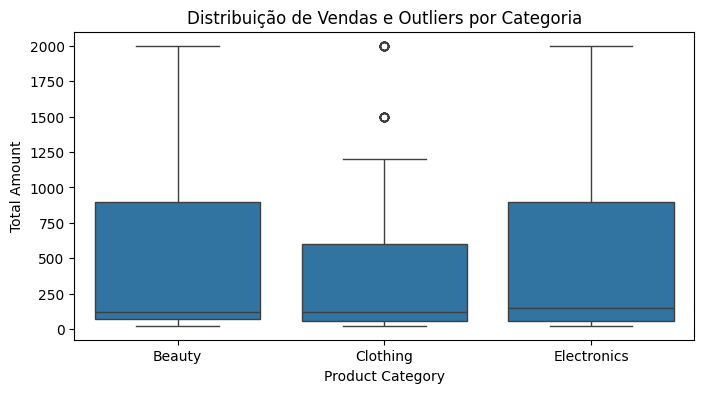

In [7]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x="Product Category", y="Total Amount", data=df)
plt.title("Distribuição de Vendas e Outliers por Categoria")


Text(0, 0.5, 'Frequência')

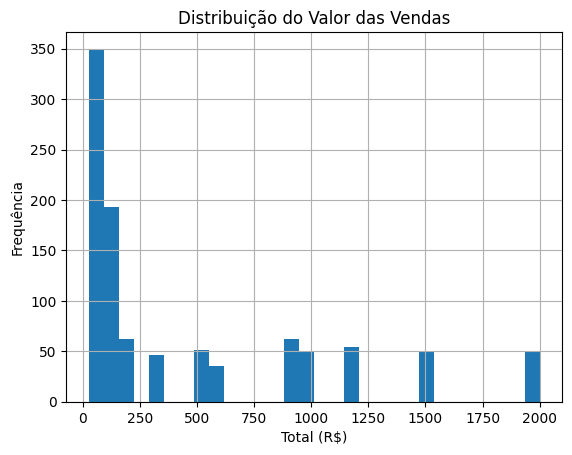

In [17]:
df['Total Amount'].hist(bins=30)
plt.title("Distribuição do Valor das Vendas")
plt.xlabel("Total (R$)")
plt.ylabel("Frequência")


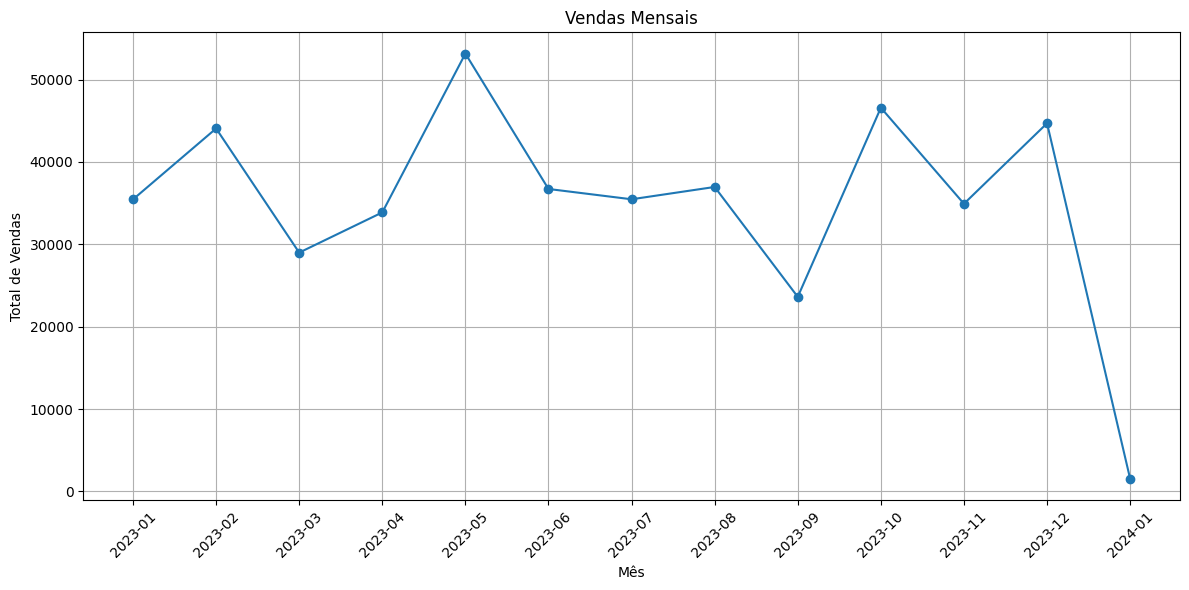

In [8]:

plt.figure(figsize=(12,6))
plt.plot(df.groupby('AnoMes')['Total Amount'].sum(), marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Vendas Mensais')
plt.xticks(rotation=45) # Rotate x-axis labels
plt.tight_layout()
plt.grid(True)
plt.show()

**Insight:** Há forte sazonalidade em novembro e dezembro, indicando efeito de Black Friday e Natal.


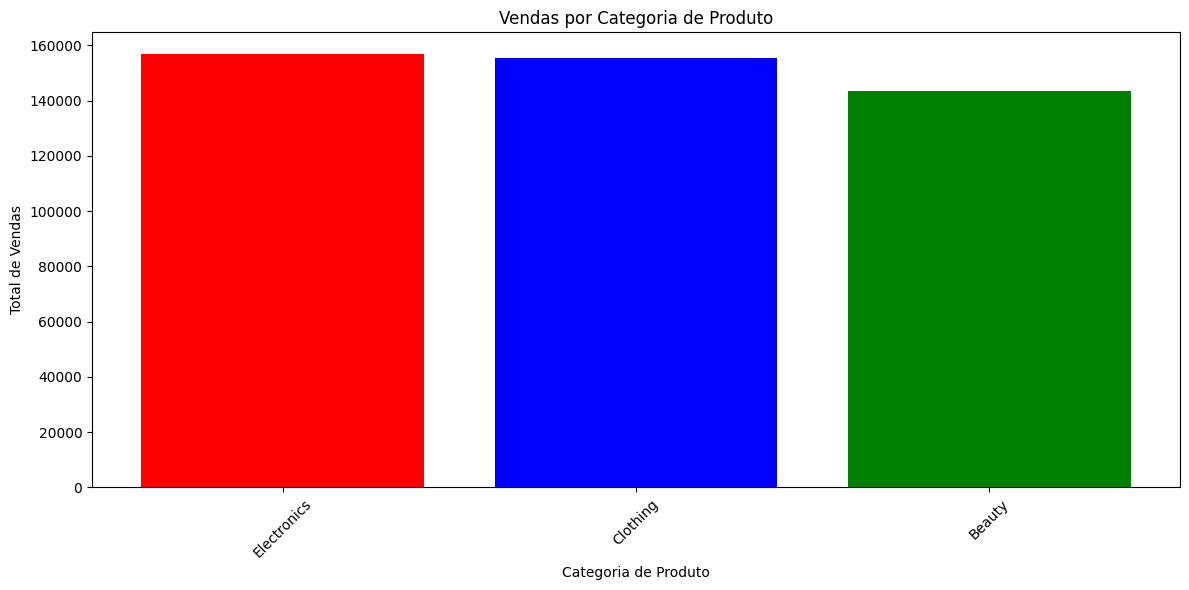

In [9]:
mostSaleCategory = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_qty = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
colors= ['red','blue','green']
plt.figure(figsize=(12,6))
plt.bar(mostSaleCategory.index, mostSaleCategory.values,color = colors)
plt.xlabel('Categoria de Produto')
plt.ylabel('Total de Vendas')
plt.title('Vendas por Categoria de Produto')
plt.xticks(rotation=45) # Rotate x-axis labels
plt.tight_layout()

plt.show()

**Insight:** Eletrônicos concentram quase metade da receita, seguidos por Vestuário.


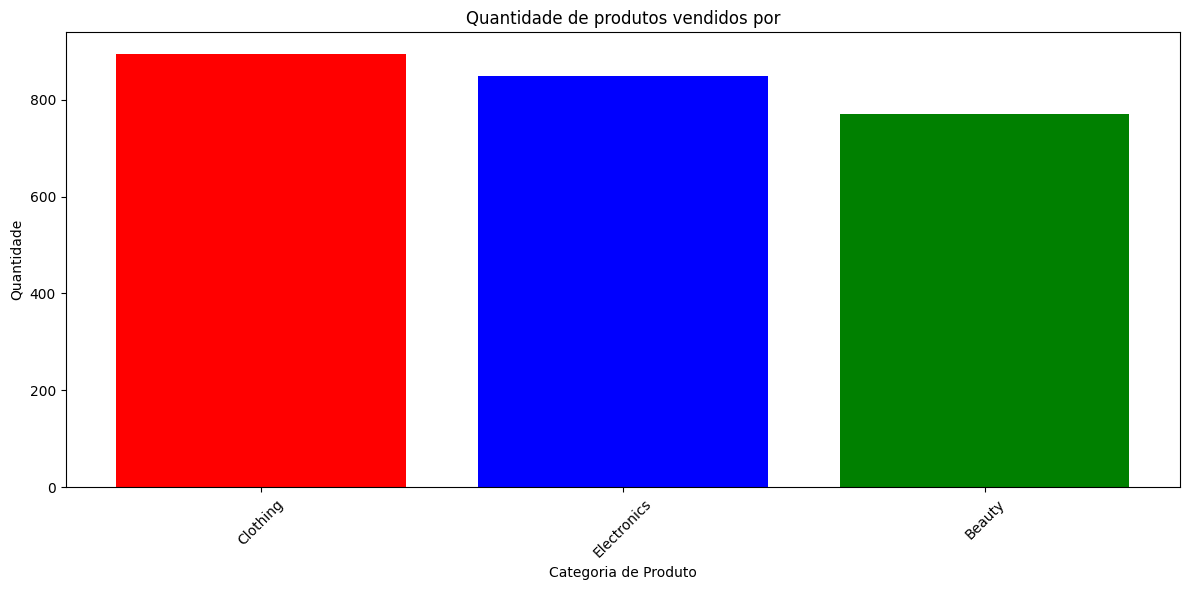

In [10]:
colors= ['red','blue','green']
plt.figure(figsize=(12,6))
plt.bar(category_qty.index, category_qty.values,color = colors)
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade')
plt.title('Quantidade de produtos vendidos por')
plt.xticks(rotation=45) # Rotate x-axis labels
plt.tight_layout()

plt.show()

In [11]:
# Definir as faixas etárias
bins = [18, 25, 35, 50, 64]
labels = ['18-25', '26-35', '36-50', '51-64']

df['Faixa_Etaria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Agrupar por faixa etária
sales_age_group = df.groupby('Faixa_Etaria')['Total Amount'].sum()

print(sales_age_group)

Faixa_Etaria
18-25     73335.0
26-35     98480.0
36-50    139660.0
51-64    133310.0
Name: Total Amount, dtype: float64


/tmp/ipython-input-2894127918.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_age_group = df.groupby('Faixa_Etaria')['Total Amount'].sum()


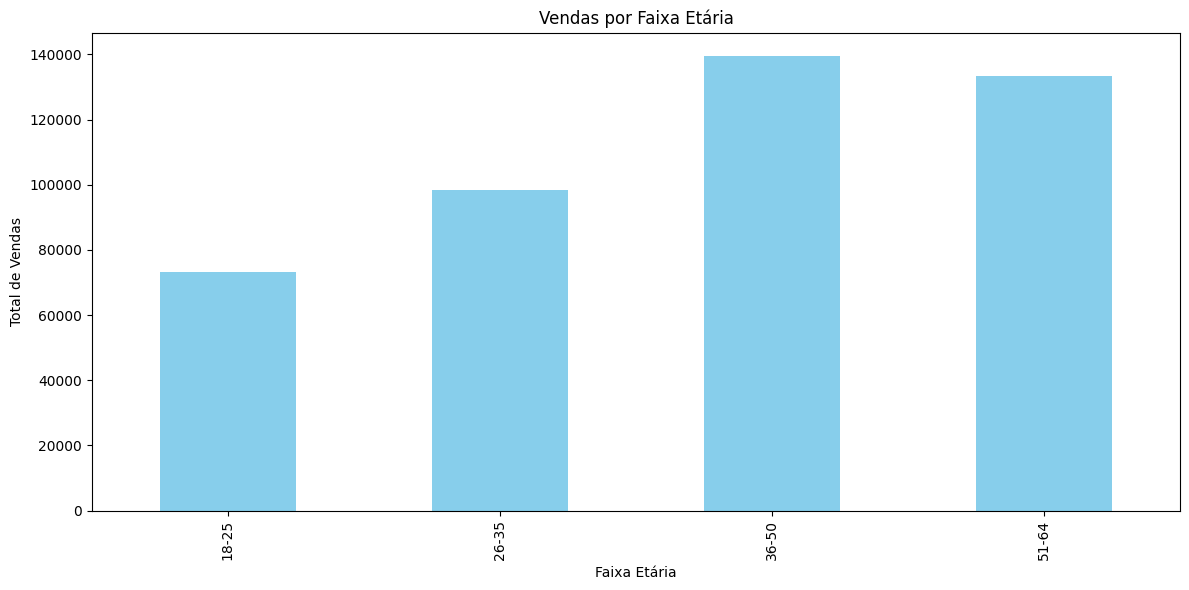

In [12]:
plt.figure(figsize=(12,6))
sales_age_group.plot(kind='bar', color='skyblue')
plt.title('Vendas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Vendas')
plt.tight_layout()
plt.show()

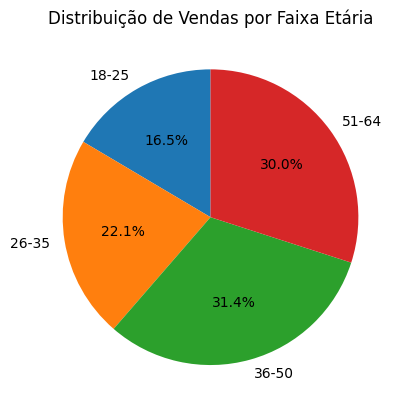

In [13]:
sales_age_group.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Vendas por Faixa Etária')
plt.ylabel('')
plt.show()

/tmp/ipython-input-3542601613.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_age_gender = df.groupby(['Faixa_Etaria', 'Gender'])['Total Amount'].sum().unstack()


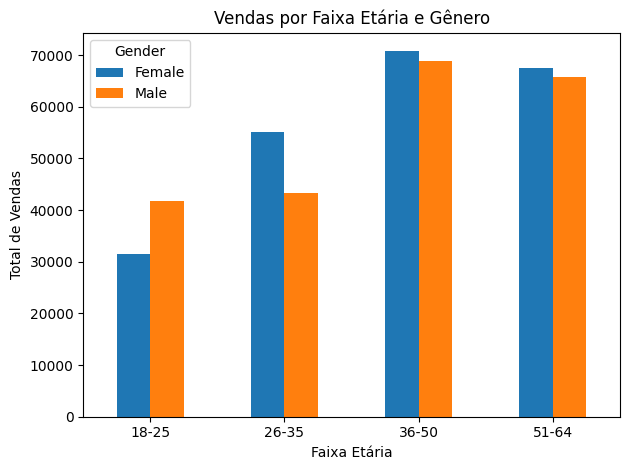

In [14]:
sales_age_gender = df.groupby(['Faixa_Etaria', 'Gender'])['Total Amount'].sum().unstack()
sales_age_gender.plot(kind='bar')
plt.title('Vendas por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
ticket_medio_idade = df.groupby('Faixa_Etaria')['Total Amount'].mean()
ticket_medio_genero = df.groupby('Gender')['Total Amount'].mean()
ticket_medio_combo = df.groupby(['Faixa_Etaria', 'Gender'])['Total Amount'].mean()

/tmp/ipython-input-1451096651.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket_medio_idade = df.groupby('Faixa_Etaria')['Total Amount'].mean()
/tmp/ipython-input-1451096651.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket_medio_combo = df.groupby(['Faixa_Etaria', 'Gender'])['Total Amount'].mean()


In [16]:
stats_all = df.groupby(['Product Category', 'Faixa_Etaria', 'Gender'])['Total Amount'].sum().reset_index()

# Tabela dinâmica para ver tudo
pivot_all = stats_all.pivot_table(
    index=['Product Category', 'Faixa_Etaria'],
    columns='Gender',
    values='Total Amount',
    fill_value=0
).reset_index()

print(pivot_all)

/tmp/ipython-input-1204639679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_all = df.groupby(['Product Category', 'Faixa_Etaria', 'Gender'])['Total Amount'].sum().reset_index()


Gender Product Category Faixa_Etaria   Female     Male
0                Beauty        18-25  10240.0  16080.0
1                Beauty        26-35  18750.0  12490.0
2                Beauty        36-50  24235.0  24875.0
3                Beauty        51-64  18410.0  13475.0
4              Clothing        18-25   9250.0  13175.0
5              Clothing        26-35  19320.0  20655.0
6              Clothing        36-50  25345.0  17630.0
7              Clothing        51-64  24785.0  21335.0
8           Electronics        18-25  12040.0  12550.0
9           Electronics        26-35  17045.0  10220.0
10          Electronics        36-50  21210.0  26365.0
11          Electronics        51-64  24270.0  31035.0


/tmp/ipython-input-1204639679.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_all = stats_all.pivot_table(


Observa-se que homens de 36–50 anos apresentam maior gasto na categoria Beleza, seguido de uma queda acentuada em 51–64 anos. Uma hipótese para esse padrão é que, na faixa de 36–50 anos, o aumento dos sinais de envelhecimento estimule maior consumo de produtos de autocuidado. Já a queda na faixa de 51–64 anos pode estar relacionada a diferenças geracionais, nas quais homens mais velhos tendem a investir menos nesse tipo de produto devido a valores culturais e hábitos formados em períodos anteriores.